In [20]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt

# Merges two subarrays of arr[].
# First subarray is arr[l..m]
# Second subarray is arr[m+1..r]


def merge(arr, l, m, r):
	n1 = m - l + 1
	n2 = r - m
	com = 0;
	# create temp arrays
	L = [0] * (n1)
	R = [0] * (n2)

	# Copy data to temp arrays L[] and R[]
	for i in range(0, n1):
		L[i] = arr[l + i]

	for j in range(0, n2):
		R[j] = arr[m + 1 + j]

	# Merge the temp arrays back into arr[l..r]
	i = 0	 # Initial index of first subarray
	j = 0	 # Initial index of second subarray
	k = l	 # Initial index of merged subarray

	while i < n1 and j < n2:
		if L[i] <= R[j]:
			arr[k] = L[i]
			i += 1
		else:
			arr[k] = R[j]
			j += 1
		com+=1        
		k += 1

	# Copy the remaining elements of L[], if there
	# are any
	while i < n1:
		arr[k] = L[i]
		i += 1
		k += 1

	# Copy the remaining elements of R[], if there
	# are any
	while j < n2:
		arr[k] = R[j]
		j += 1
		k += 1
	return com
# l is for left index and r is right index of the
# sub-array of arr to be sorted


def mergeSort(arr, l, r, s):
	length = r-l+1
	comparisons = 0; 
	if(length <= s):
		subarr = arr[l:r+1]
		comparisons+=insertionSort(subarr)
		for i in range(0,len(subarr)):
			arr[l+i] = subarr[i]
		return comparisons
	if l < r:
		# Same as (l+r)//2, but avoids overflow for
		# large l and h
		m = l+(r-l)//2

		# Sort first and second halves
		comparisons+=mergeSort(arr, l, m, s)
		comparisons+=mergeSort(arr, m+1, r, s)
		comparisons+=merge(arr, l, m, r)
	return comparisons


In [17]:
import random
import time
import numpy as np
import matplotlib as plt

# Merges two sorted subarrays into one.
# The first subarray is arr[l..m], and the second subarray is arr[m+1..r].
# Returns the number of comparisons made during merging.

def merge(arr, l, m, r):
    n1 = m-l + 1  #length of left subarray
    n2 = r-m      #length of right array
    com = 0         #initialise counter for comparisons
    
    #create temp arrays to store elements of n1 and n2 subarrays
    L = [0] * n1    #temp array for left subarray
    R = [0] * n2    #temp array for right subarray
    
    #Copy elements of n1 and n2 to temp arrays L and R
    for i in range(0, n1):
        L[i] = arr[l + i]     #copy left subarray
    
    for i in range(0, n2):
        R[i] = arr[m + 1 +j]  #copy right subarray
        
    i = 0  #initial index of left subarray (L)
    j = 0  #initial index of right subarray (R)
    k = l  #initial index of merged array (arr)
    
    #merge two subarrays by comparing elements from (L) and (R)
    while i < n1 and j < n2:
        if L[i] <= R[i]:  #if current element of L is <= element of R
            arr[k] = L[i] #place element of L into merged array
            i += 1        #move to next element in L
        else:            
            arr[k] = R[j] #else, store R[j] into merged array
            j += 1        #move to next element in L
        com += 1          #increment comparison
        k += 1            #move to next position in merged array
        
    while i < n1:      #copy any remaining elements from R[], if any
        arr[k] = L[i]
        i += 1
        k += 1
        
    while j < n2:      #copy any remaining elements from R[], if any
        arr[k] = R[j]
        j += 1
        k += 1
    
    return com  #return total number of comparisons made during merging

# Hybrid Merge Sort function that switches to Insertion Sort for small subarrays.
# arr: Array to be sorted.
# l: Left index of the array (start).
# r: Right index of the array (end).
# s: Threshold for switching to Insertion Sort.

def mergeSort(arr, l, r, s):

    length = r - l + 1       #calculate length of current subarray
    comparisons = 0
    
    if length <= s:          #if subarray size <= threshold, use Insertion Sort
        subarr = arr[l:r+1]  #create subarray from arr[l...r]
        comparisons += insertionSort(subarr) #sort the subarray using Insertion Sort and imcrement comparison
        
        for i in range(0, len(subarr)):
            arr[l + i] = subarr[i]  #copy sorted subarray back to original array
        return comparisons   #retun number of comparisons made in Insertion Sort
    
    if l < r:
        m = l + (r - l) // 2   #find middle point to divide array
        comparisons+=mergeSort(arr, l, m, s)   #recursively sort the first half
        comparisons+=mergeSort(arr, m+1, r, s) #recursively sort the second half
        comparisons+=merge(arr, l, m, r)      #merge two halves
        
    return comparisons        #return total number of comparisons made


In [18]:
#Insertion Sort function, used for sorting small subarrays
#arr: array (or subarray) to be sorted
#returns number of comparisons made

def insertionSort(arr):
    n = len(arr)    #get length of array
    comparisons = 0 #initialise comparison counter
    
    if n <= 1:     #best case: if array has 0 or 1 element, means already sorted
        return      #no comparisons needed
    
    for i in range(1, n):   #iterate over the array starting from second element
        key = arr[i]           #store current element as key to be inserted
        j = i -1
    
        while j >=0 and key < arr[j]:  #if j  is greater than key, move j to one position ahead
            arr [j + 1] = arr[j] #shift larger element one position to the right
            j -=1                #move to previous element
            comparisons +=1      #increment comparison counter
        
        arr[j + 1] = key         #insert key into correct position
    
    return comparisons           #return number of comparisons made in Insertion Sort

    

In [21]:

def insertionSort(arr):

	n = len(arr) # Get the length of the array
	comparisons = 0;
	if n <= 1:
		return # If the array has 0 or 1 element, it is already sorted, so return
    
	for i in range(1, n): # Iterate over the array starting from the second element
		key = arr[i] # Store the current element as the key to be inserted in the right position
		j = i-1
		while j >= 0 and key < arr[j]: # Move elements greater than key one position ahead
			arr[j+1] = arr[j] # Shift elements to the right
			j -= 1
			comparisons+=1;
		arr[j+1] = key # Insert the key in the correct position
	return comparisons


### (i) S fixed, different sizes of input list

In [22]:
arrSize = 100000
arr = np.array([0] * arrSize)
arr1 = np.array([0] * arrSize*5)
arr2 = np.array([0] * arrSize*10)

for i in range (0, len(arr)):
    arr[i]=random.randint(1,100)

for i in range (0, len(arr1)):
    arr1[i]=random.randint(1,100)
    
for i in range (0, len(arr2)):
    arr2[i]=random.randint(1,100)


#arraysize of 1000
st=time.time()
comparisons1 = mergeSort(arr, 0, len(arr)-1, 10)
print("No. of comparisons for arraysize of 1000: ", comparisons1)
et1=(time.time() - st) * 1000000
print(et1, " microseconds")

#arraysize of 10,000
st=time.time()
comparisons2 = mergeSort(arr1, 0, len(arr1)-1, 10)
print("No. of comparisons for arraysize of 10,000: ", comparisons2)
et2=(time.time() - st) * 1000000
print(et2, " microseconds")

#arraysize of 1,000,000
st=time.time()
comparisons3 = mergeSort(arr2, 0, len(arr2)-1, 10)
print("No. of comparisons for arraysize of 1,000,000: ", comparisons3)
et3=(time.time() - st) * 1000000
et3_ms = et3 / 1000
print(et3, " microseconds which is ")

No. of comparisons for arraysize of 1000:  1493764
540910.005569458  microseconds
No. of comparisons for arraysize of 10,000:  8681566
3340823.8887786865  microseconds
No. of comparisons for arraysize of 1,000,000:  18352418
7036905.527114868  microseconds


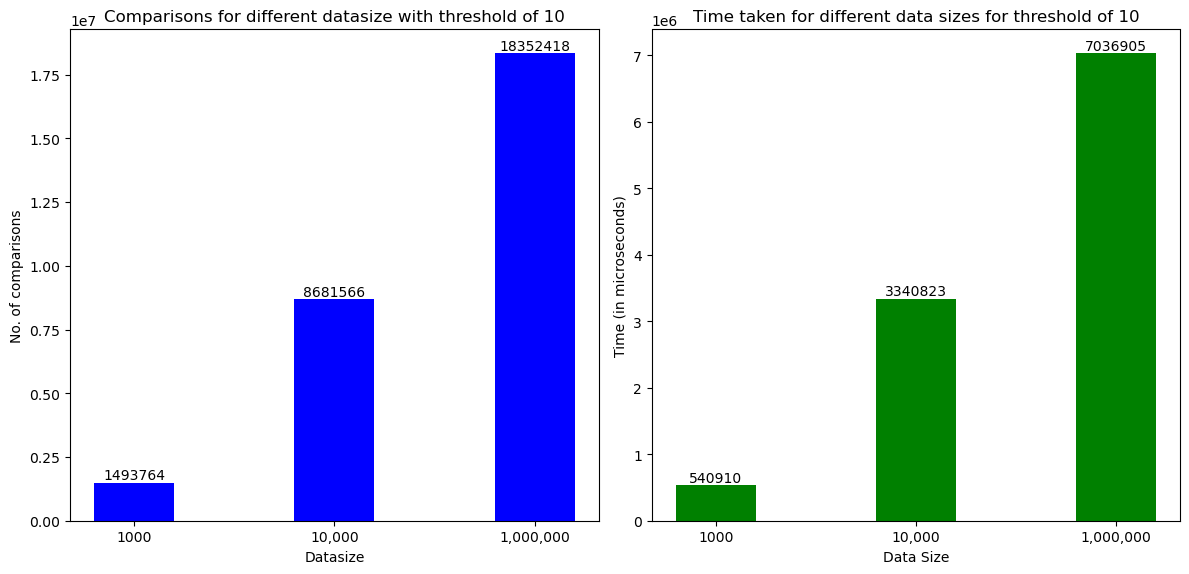

In [23]:
# creating the dataset
data = {'1000':comparisons1, '10,000':comparisons2, '1,000,000':comparisons3}
data1 = {'1000':et1, '10,000':et2, '1,000,000':et3}
times_value = list(data1.values())
courses = list(data.keys())
values = list(data.values())

f, axes = plt.subplots(1, 2, figsize=(12, 6))

# creating the first bar plot for comparisons
bars1 = axes[0].bar(courses, values, color='blue', width=0.4)
axes[0].set_xlabel("Datasize")
axes[0].set_ylabel("No. of comparisons")
axes[0].set_title("Comparisons for different datasize with threshold of 10")

# adding data values on top of the first bar chart
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

#creating the second bar plot for time
bars2 = axes[1].bar(courses, times_value, label='Time (in microseconds)', color ='green', width=0.4)
axes[1].set_xlabel("Data Size")
axes[1].set_ylabel("Time (in microseconds)")
axes[1].set_title("Time taken for different data sizes for threshold of 10")

# adding data values on top of the second bar chart
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() /2, height, f'{int(height)}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display both charts
plt.show()

### (ii) Data size is fixed, different value of S

In [24]:
arrSize = 1000000
arr = np.array([0] * arrSize)

for i in range (0, len(arr)):
    arr[i]=random.randint(1,100)
arr1 = arr.copy()
arr2 = arr.copy()


#threshold 10 
st=time.time()
comparison1 = mergeSort(arr, 0, len(arr)-1, 10)
print("Threshold of 10: ", comparison1)
et1=(time.time() - st) * 1000000
print(et1, " microseconds")

#threshold 16
st=time.time()
comparison2 = mergeSort(arr1, 0, len(arr1)-1, 16)
print("Threshold of 16: ", comparison2)
et2=(time.time() - st) * 1000000
print(et2, " microseconds")
#threshold 20
st=time.time()
comparison3 = mergeSort(arr2, 0, len(arr2)-1, 20)
print("Threshold of 20: ", comparison3)
et3=(time.time() - st) * 1000000
print(et3, " microseconds")
print(arr)

Threshold of 10:  18353160
14110471.963882446  microseconds
Threshold of 16:  19352911
14049912.452697754  microseconds
Threshold of 20:  19352911
13904107.332229614  microseconds
[  1   1   1 ... 100 100 100]


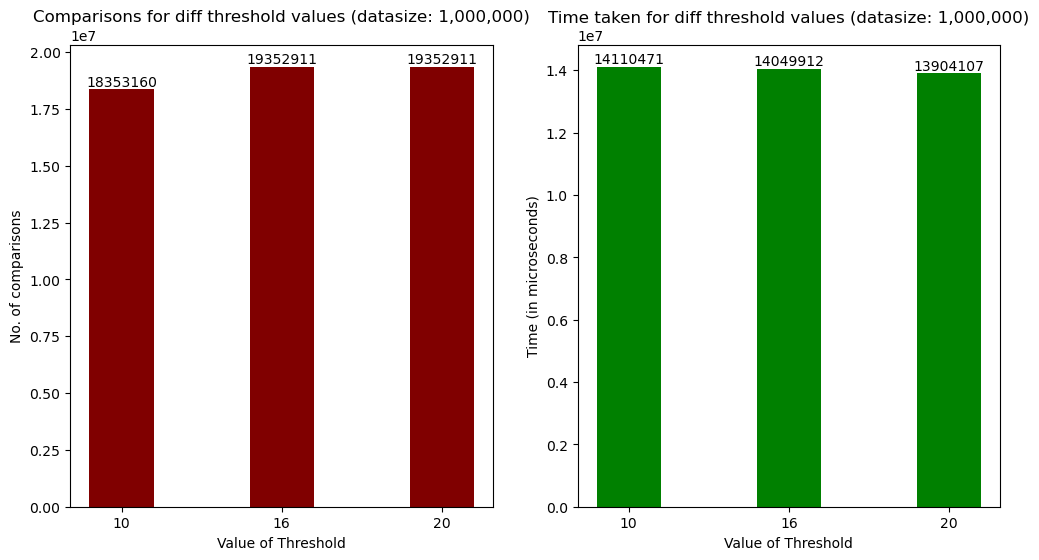

<Figure size 1000x500 with 0 Axes>

In [25]:
# creating the dataset
data = {'10':comparison1, '16':comparison2, '20':comparison3}
data1 = {'10':et1, '16':et2, '20':et3}
threshold = list(data.keys())
values = list(data.values())
times_value = list(data1.values())

f, axes = plt.subplots(1,2, figsize=(12,6))
fig = plt.figure(figsize = (10, 5))

# creating the first bar plot for comparisons
bar1 = axes[0].bar(threshold, values, label='Comparisons', color ='maroon', width=0.4)
axes[0].set_xlabel("Value of Threshold")
axes[0].set_ylabel("No. of comparisons")
axes[0].set_title("Comparisons for diff threshold values (datasize: 1,000,000)")

for bar in bar1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() /2, height, f'{int(height)}', ha='center', va='bottom')


bar2 = axes[1].bar(threshold, times_value, label='Time (in microseconds)', color ='green', width=0.4)
axes[1].set_xlabel("Value of Threshold")
axes[1].set_ylabel("Time (in microseconds)")
axes[1].set_title("Time taken for diff threshold values (datasize: 1,000,000)")

for bar in bar2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
    
# Adjust layout to prevent overlap
plt.tight_layout()

# Display both charts
plt.show()

### (iii) Different size of dataset, find optimum value of S

In [21]:
arrSize = 1000
arr = np.array([0] * arrSize)

for i in range (0, len(arr)):
    arr[i]=random.randint(1,100)
arr1 = arr.copy()
arr2 = arr.copy()

#threshold 10 
st=time.time()
comparison1 = mergeSort(arr, 0, len(arr)-1, 10)
print("Small array size of 1000 with threshold 10: ", comparison1)
et1=(time.time() - st) * 1000000
print(et1, " microseconds")

#threshold 16
st=time.time()
comparison2 = mergeSort(arr1, 0, len(arr1)-1, 16)
print("Small array size of 1000 with threshold 16: ", comparison2)
et2=(time.time() - st) * 1000000
print(et2, " microseconds")

#threshold 20
st=time.time()
comparison3 = mergeSort(arr2, 0, len(arr2)-1, 20)
print("Small array size of 1000 with threshold 20: ", comparison3)
et3=(time.time() - st) * 1000000
print(et3, " microseconds")


Small array size of 1000 with threshold 10:  8437
6096.839904785156  microseconds
Small array size of 1000 with threshold 16:  9409
6336.688995361328  microseconds
Small array size of 1000 with threshold 20:  9409
5059.003829956055  microseconds


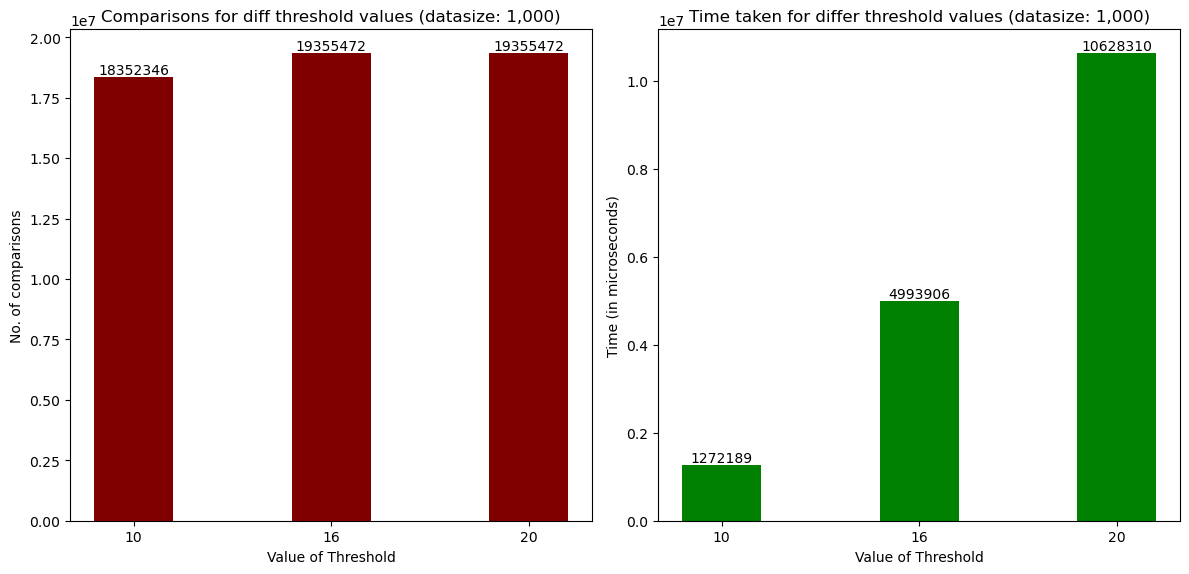

In [59]:
# creating the dataset for comparison
data = {'10':comparison1, '16':comparison2, '20':comparison3}
# creating the dataset for time
data1 = {'10':et1, '16':et2, '20':et3}
threshold = list(data.keys())
values = list(data.values())
times_value = list(data1.values())

f, axes = plt.subplots(1,2, figsize=(12,6))

# creating the bar plot
bar1 = axes[0].bar(threshold, values, label='Comparisons', color ='maroon', width=0.4)
axes[0].set_xlabel("Value of Threshold")
axes[0].set_ylabel("No. of comparisons")
axes[0].set_title("Comparisons for diff threshold values (datasize: 1,000)")

for bar in bar1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
    
bar2 = axes[1].bar(threshold, times_value, label='Time (in microseconds)', color ='green', width=0.4)
axes[1].set_xlabel("Value of Threshold")
axes[1].set_ylabel("Time (in microseconds)")
axes[1].set_title("Time taken for differ threshold values (datasize: 1,000)")

for bar in bar2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
    
# Adjust layout to prevent overlap
plt.tight_layout()

# Display both charts
plt.show()

In [23]:
arrSize = 100000
arr = np.array([0] * arrSize)

for i in range (0, len(arr)):
    arr[i]=random.randint(1,100)
arr1 = arr.copy()
arr2 = arr.copy()

#threshold 10 
st=time.time()
comparison1 = mergeSort(arr, 0, len(arr)-1, 10)
print("Medium array size of 100,000 with threshold 10: ", comparison1)
et1=(time.time() - st) * 1000000
print(et1, " microseconds")

#threshold 16
st=time.time()
comparison2 = mergeSort(arr1, 0, len(arr1)-1, 16)
print("Medium array size of 100,000 with threshold 16: ", comparison2)
et2=(time.time() - st) * 1000000
print(et2, " microseconds")

#threshold 20
st=time.time()
comparison3 = mergeSort(arr2, 0, len(arr2)-1, 20)
print("Medium array size of 100,000 with threshold 20: ", comparison3)
et3=(time.time() - st) * 1000000
print(et3, " microseconds")

Medium array size of 100000 with threshold 10:  1494071
868870.735168457  microseconds
Medium array size of 100000 with threshold 16:  1558752
1098028.6598205566  microseconds
Medium array size of 100000 with threshold 20:  1558752
879113.6741638184  microseconds


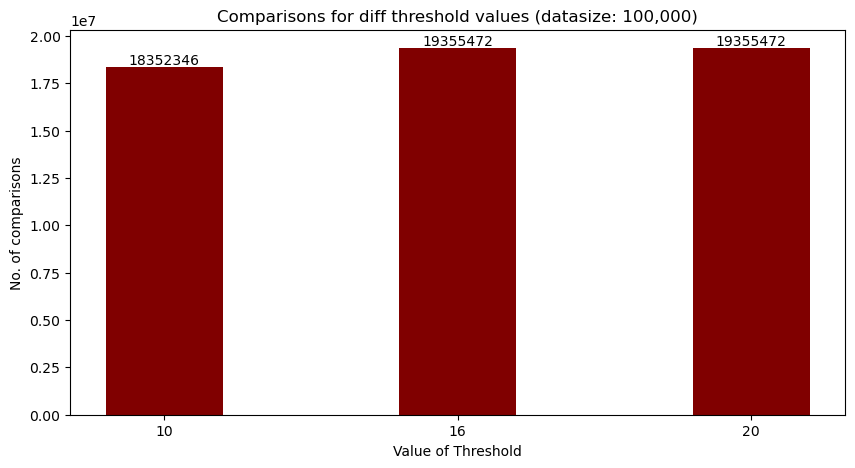

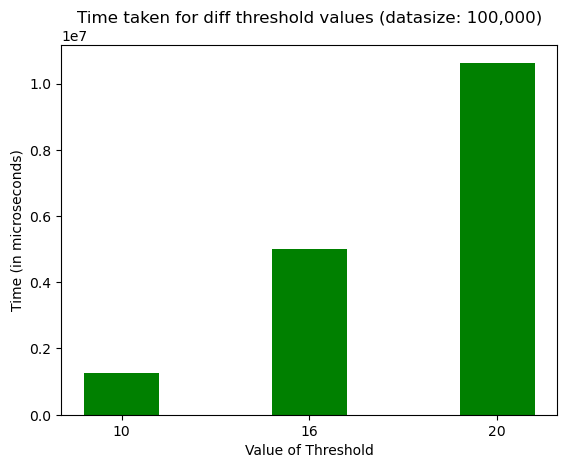

In [68]:
# creating the dataset
data = {'10':comparison1, '16':comparison2, '20':comparison3}
data1 = {'10':et1, '16':et2, '20':et3}
threshold = list(data.keys())
values = list(data.values())
times_value = list(data1.values())

fig = plt.figure(figsize = (10, 5))


# creating the first bar plot
bar1 = plt.bar(threshold, values, label='Comparisons', color ='maroon', width=0.4)
plt.xlabel("Value of Threshold")
plt.ylabel("No. of comparisons")
plt.title("Comparisons for diff threshold values (datasize: 100,000)")

for bar in bar1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
# Display chart
plt.show()

# creating the second bar plot
bar2 = plt.bar(threshold, times_value, label='Time (in microseconds)', color ='green', width=0.4)
plt.xlabel("Value of Threshold")
plt.ylabel("Time (in microseconds)")
plt.title("Time taken for diff threshold values (datasize: 100,000)")

# Display chart
plt.show()

In [25]:
arrSize = 10000000
arr = np.array([0] * arrSize)

for i in range (0, len(arr)):
    arr[i]=random.randint(1,100)
arr1 = arr.copy()
arr2 = arr.copy()

#threshold 10 
st=time.time()
comparison1 = mergeSort(arr, 0, len(arr)-1, 10)
print("Large array size of 10000000 with threshold 10: ", comparison1)
et1=(time.time() - st) * 1000000
print(et1, " microseconds")

#threshold 16
st=time.time()
comparison2 = mergeSort(arr1, 0, len(arr1)-1, 16)
print("Large array size of 10000000 with threshold 16: ", comparison2)
et2=(time.time() - st) * 1000000
print(et2, " microseconds")

#threshold 20
st=time.time()
comparison3 = mergeSort(arr2, 0, len(arr2)-1, 20)
print("Large array size of 10000000 with threshold 20: ", comparison3)
et3=(time.time() - st) * 1000000
print(et3, " microseconds")

Large array size of 10000000 with threshold 10:  218517149
132325922.48916626  microseconds
Large array size of 10000000 with threshold 16:  218517149
126321711.54022217  microseconds
Large array size of 10000000 with threshold 20:  233025009
131504878.99780273  microseconds


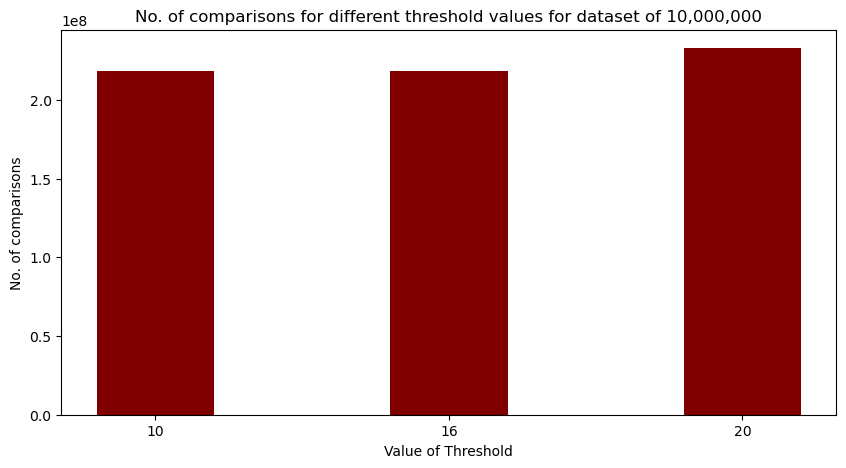

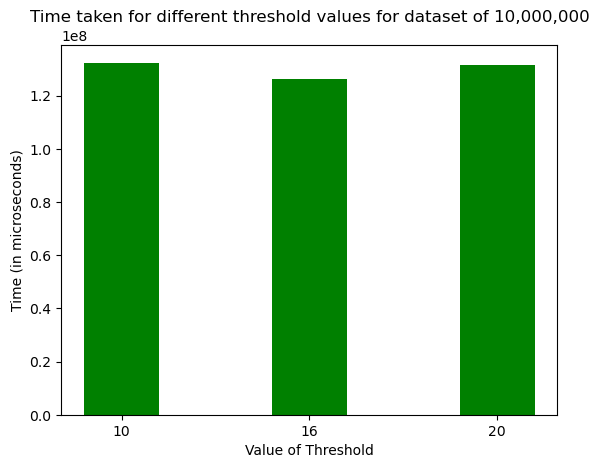

In [27]:
# creating the dataset
data = {'10':comparison1, '16':comparison2, '20':comparison3}
data1 = {'10':et1, '16':et2, '20':et3}
threshold = list(data.keys())
values = list(data.values())
times_value = list(data1.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(threshold, values, label='Comparisons', color ='maroon', width=0.4)

plt.xlabel("Value of Threshold")
plt.ylabel("No. of comparisons")
plt.title("No. of comparisons for different threshold values for dataset of 10,000,000")
plt.show()


plt.bar(threshold, times_value, label='Time (in microseconds)', color ='green', width=0.4)
plt.xlabel("Value of Threshold")
plt.ylabel("Time (in microseconds)")
plt.title("Time taken for different threshold values for dataset of 10,000,000")
plt.show()

Threshold 16 seems to give a consistent time taken across different data size.

### Part d - Compare with original Mergesort using 10 million integers

In [29]:
def mergeSort_original(arr, l, r):
	length = r-l+1
	comparisons = 0; 
	if l < r:
		# Same as (l+r)//2, but avoids overflow for
		# large l and h
		m = l+(r-l)//2

		# Sort first and second halves
		comparisons+=mergeSort_original(arr, l, m)
		comparisons+=mergeSort_original(arr, m+1, r)
		comparisons+=merge(arr, l, m, r)
	return comparisons

Merge Sort only has lesser comparisons made but took a longer execution time.

In [31]:
arrSize = 10000000
arr = np.array([0] * arrSize)

for i in range (0, len(arr)):
    arr[i]=random.randint(1,100)
arr1 = arr.copy()

#threshold 16
st=time.time()
comparison1 = mergeSort(arr, 0, len(arr)-1, 16)
print("Large array size of 10,000,000 with hybrid sort: ",comparison1)
et1=(time.time() - st) * 1000
print(et1)

st=time.time()
comparison2 = mergeSort_original(arr1, 0, len(arr1)-1)
print("Large array size of 10,000,000 with mergeSort only: ",comparison2)
et2=(time.time() - st) * 1000
print(et2)

Large array size of 10,000,000 with hybrid sort:  218527567
125188.26341629028
Large array size of 10,000,000 with mergeSort only:  219409181
143338.33289146423


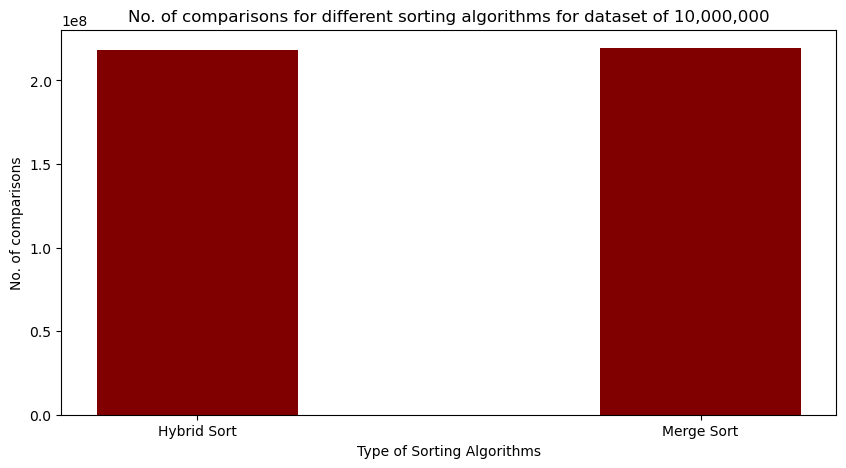

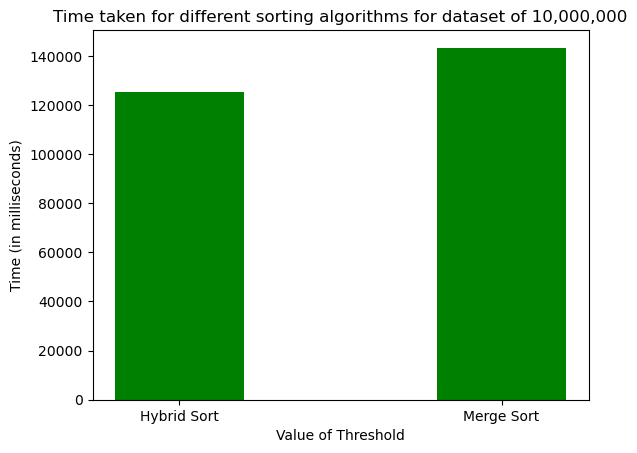

In [32]:
# creating the dataset
data = {'Hybrid Sort':comparison1, 'Merge Sort':comparison2}
data1 = {'Hybrid Sort':et1, 'Merge Sort':et2,}
threshold = list(data.keys())
values = list(data.values())
times_value = list(data1.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(threshold, values, label='Comparisons', color ='maroon', width=0.4)

plt.xlabel("Type of Sorting Algorithms")
plt.ylabel("No. of comparisons")
plt.title("No. of comparisons for different sorting algorithms for dataset of 10,000,000")
plt.show()


plt.bar(threshold, times_value, label='Time (in milliseconds)', color ='green', width=0.4)
plt.xlabel("Value of Threshold")
plt.ylabel("Time (in milliseconds)")
plt.title("Time taken for different sorting algorithms for dataset of 10,000,000")
plt.show()